In [1]:
import numpy as np
import random
import gym
import matplotlib.pyplot as plt

In [6]:
((1.732*1000)/25)*100

6928.0

In [20]:
arr = np.random.rand(4,6)
arr

array([[0.19323801, 0.62677901, 0.95796776, 0.15537337, 0.86759173,
        0.57453128],
       [0.69534891, 0.42064036, 0.75582526, 0.20886922, 0.85110325,
        0.5663599 ],
       [0.40826471, 0.1928036 , 0.12729441, 0.60901695, 0.30862346,
        0.1871906 ],
       [0.86387955, 0.4889984 , 0.71635671, 0.94925964, 0.40297252,
        0.92871621]])

In [22]:
arr.flatten().tolist()

[0.1932380057220553,
 0.6267790120386201,
 0.9579677618720887,
 0.15537336838824456,
 0.867591728400936,
 0.5745312765427252,
 0.6953489113334864,
 0.42064035569097213,
 0.7558252611208183,
 0.20886922409057895,
 0.8511032543115289,
 0.5663598996544016,
 0.4082647132340832,
 0.1928036029868927,
 0.1272944095999673,
 0.609016949685497,
 0.3086234615200242,
 0.18719060404939514,
 0.8638795542885722,
 0.4889984031263678,
 0.7163567059625993,
 0.949259635704652,
 0.4029725203401562,
 0.9287162055455298]

In [23]:
arr - np.array(arr.flatten().tolist()).reshape(4,6)

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [4]:
int(1099/100)

10

In [39]:
def new_feature(x):
    if x == 0:
        y = 0
    else:
        y = -x*np.log(x)
    return y

In [40]:
x = np.linspace(0,1,10000)

In [41]:
y = [new_feature(i) for i in x]

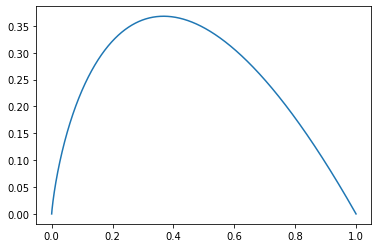

In [42]:
plt.plot(x,y)
plt.show()

In [43]:
max(y)

0.36787943869817

In [44]:
min(y)

0

In [16]:
np.log10(0)

/Users/joshnevin/.pyenv/versions/3.7.12/envs/rlenvsb3cont/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf